<a href="https://colab.research.google.com/github/simaafshar/NanoCLUST/blob/master/3k_ticks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob


In [ ]:
paths = glob.glob("/content/drive/MyDrive/3k_ticks/*")
print(paths[0])
print("Number of detected images: ", len(paths))

/content/drive/MyDrive/3k_ticks/2019-00016 Ventral.jpg
Number of detected images:  53


In [ ]:
print(paths[36])

/content/drive/MyDrive/3k_ticks/2019-00019 ventral-post.jpg


(2988, 5312, 3)


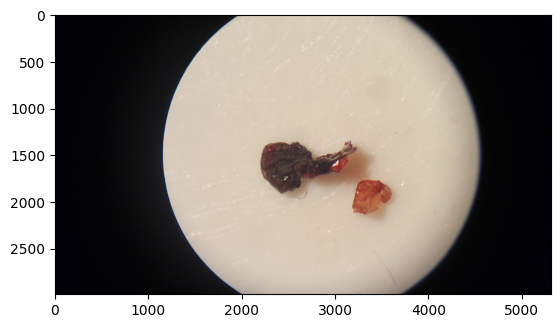

In [ ]:
image = plt.imread(paths[0])
plt.imshow(image)
print(image.shape)

255


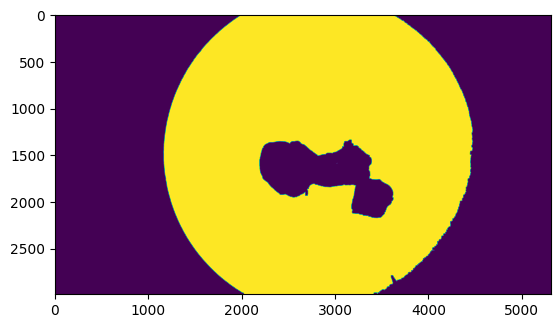

In [ ]:
#make the image binary
def rgb_to_binary_using_otsu(image,threshold_value):

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve Otsu's performance
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Otsu's thresholding to convert to binary image
    _, binary_image = cv2.threshold(blurred_image, threshold_value, 255, cv2.THRESH_BINARY)
        # Apply dilation to reduce noise (using a 3x3 kernel)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

    # Apply erosion to reverse the dilation effect
    eroded_image = cv2.erode(dilated_image, kernel, iterations=5)

    return eroded_image

binary_img = rgb_to_binary_using_otsu(image,150)
plt.imshow(binary_img)
print(np.max(binary_img))



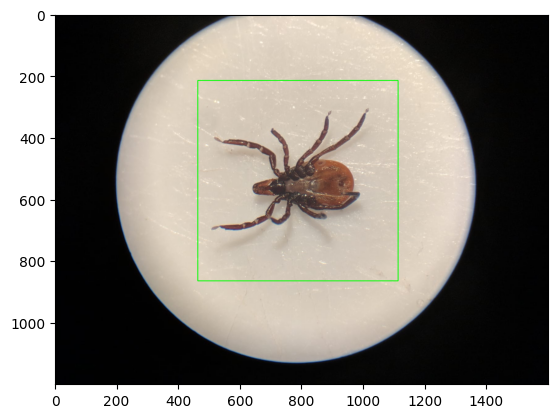

Bounding Box Coordinates: (463, 215, 1113, 865)


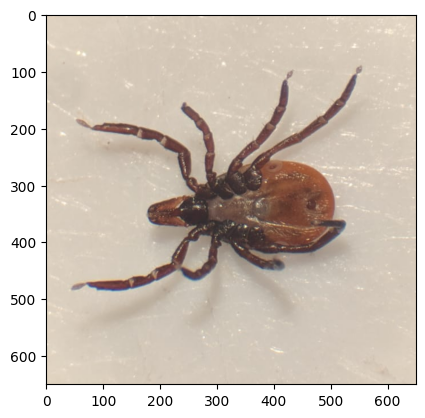

In [165]:
import cv2

def find_blob_bounding_box(image,threshold_value):

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve Otsu's performance
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Otsu's thresholding to convert to binary image
    _, binary_image = cv2.threshold(blurred_image, threshold_value, 255, cv2.THRESH_BINARY)
        # Apply dilation to reduce noise (using a 3x3 kernel)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

    # Apply erosion to reverse the dilation effect
    eroded_image = cv2.erode(dilated_image, kernel, iterations=5)


    # Set up the SimpleBlobDetector parameters
    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = False
    params.minArea = 1  # Minimum area of the blob
    params.filterByCircularity = False  # We want any blob, regardless of circularity
    params.filterByConvexity = False
    params.filterByInertia = False

    # Create a blob detector with the parameters
    detector = cv2.SimpleBlobDetector_create(params)
    #plt.imshow(eroded_image)
    #plt.show()
    # Detect blobs in the binary image
    keypoints = detector.detect(eroded_image)
    if len(keypoints) == 0:
      x, y, w, h = 0, 0, 20, 20
    else:
      max_index = 0
      if len(keypoints)>1:
        for i, k in enumerate(keypoints):
          if k.size>keypoints[max_index].size:
            max_index = i
        keypoints = [keypoints[max_index]]

      if keypoints[0].size>np.min(gray_image.shape)/1.8:
        keypoints[0].size = np.min(gray_image.shape)/1.8
      #for k in keypoints:
      #  print(k.pt)
      #  print(k.size)

      # Find the closest blob to the center
      closest_keypoint = keypoints[0]

      # Get the bounding box coordinates
      x, y, w, h = int(closest_keypoint.pt[0]-1.8/2*closest_keypoint.size), int(closest_keypoint.pt[1]-1.8/2*closest_keypoint.size), int(1.8*closest_keypoint.size), int(1.8*closest_keypoint.size)

    # Draw a bounding box on the image
    image_with_bounding_box = cv2.rectangle(image.copy(), (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image_with_bounding_box, (x, y, x + w, y + h)


image = plt.imread(paths[20])
# Call the function to find the blob bounding box
image_with_bounding_box, bounding_box_coords = find_blob_bounding_box(image,150)

# Display the original image with the bounding box
plt.imshow(image_with_bounding_box)
plt.show()

# Print the bounding box coordinates (x_min, y_min, x_max, y_max)
print("Bounding Box Coordinates:", bounding_box_coords)

plt.imshow(image[bounding_box_coords[1]:bounding_box_coords[3],bounding_box_coords[0]:bounding_box_coords[2],:])
plt.show()

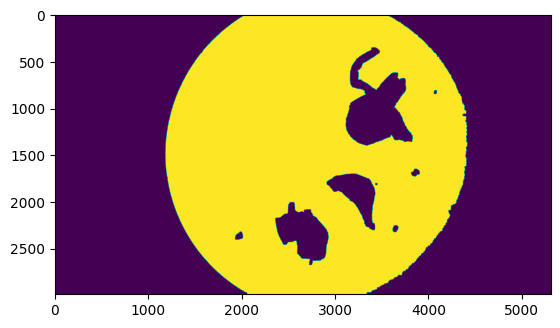

(3433.235107421875, 1000.273681640625)
776.7393798828125
0


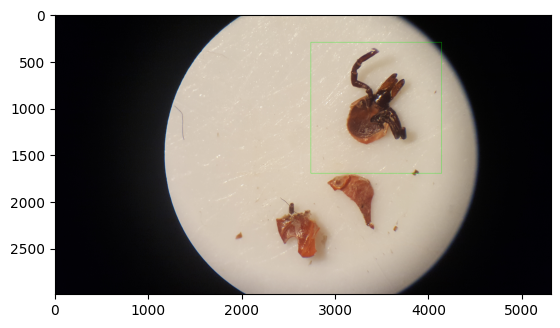

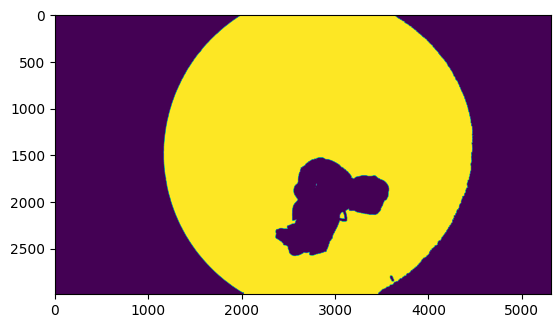

(2917.525634765625, 2033.41015625)
964.7229614257812
1


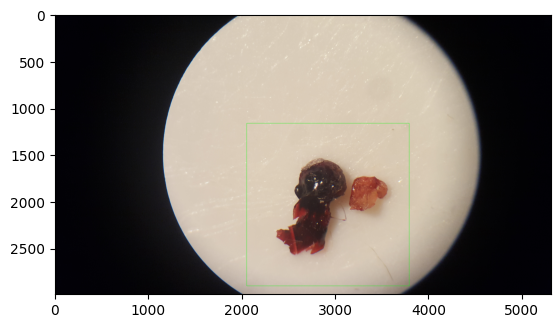

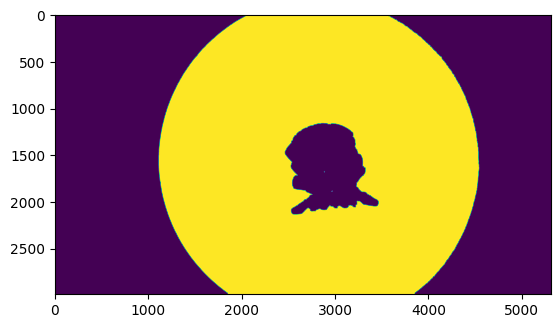

(2866.344482421875, 1587.1500244140625)
934.7347412109375
2


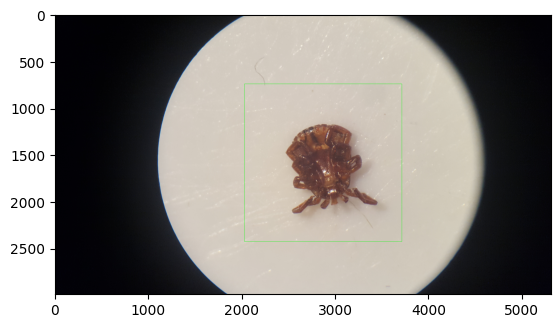

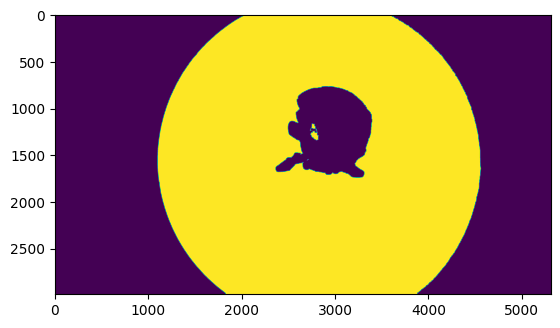

(2881.83837890625, 1387.3311767578125)
935.1806030273438
3


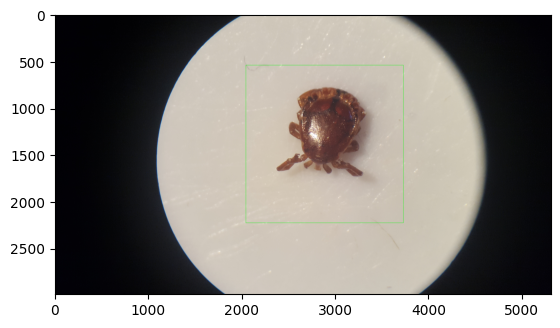

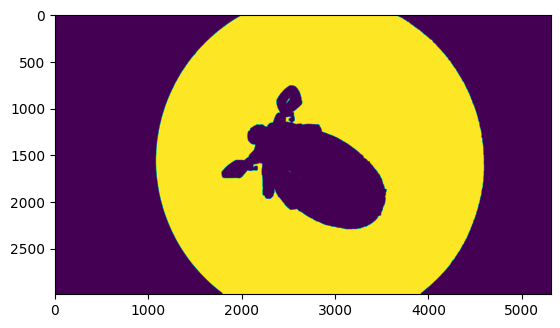

(2791.8232421875, 1596.119384765625)
1347.0257568359375
4


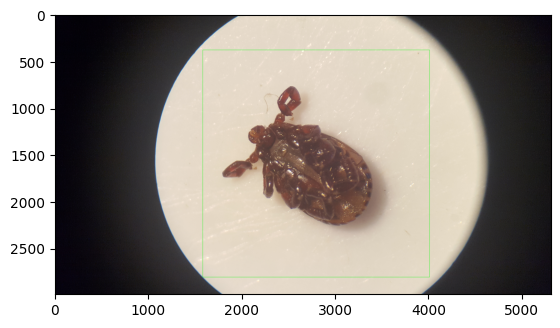

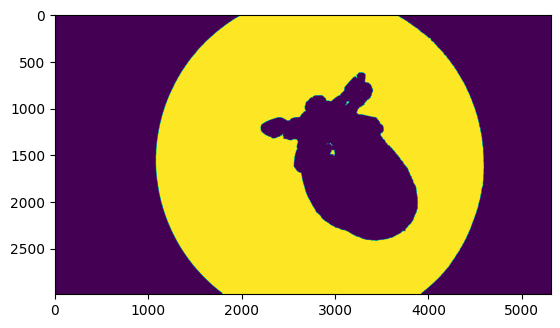

(2973.271728515625, 1503.95849609375)
1499.6754150390625
5


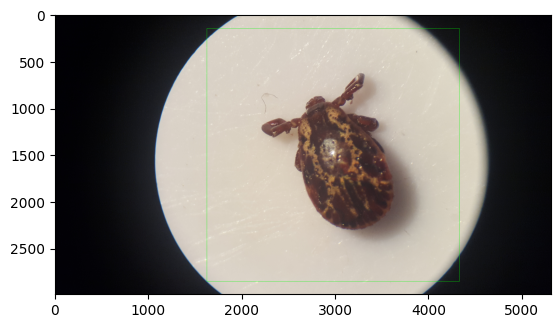

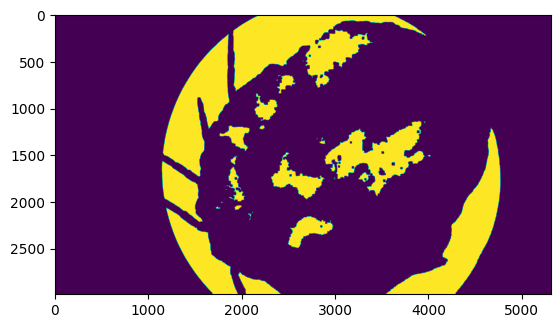

(1529.7078857421875, 1004.7659301757812)
790.5913696289062
6


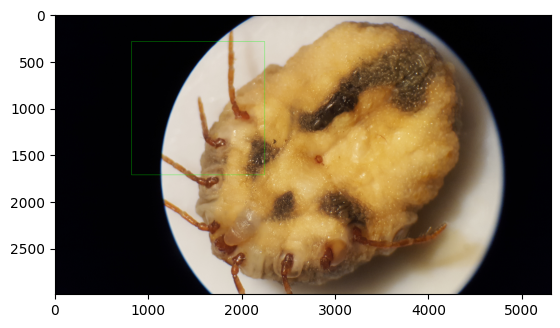

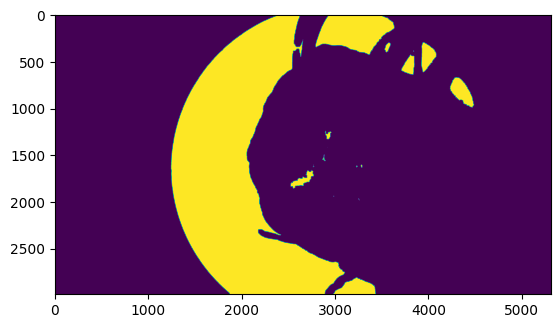

IndexError: ignored

In [112]:
for i,path in enumerate(paths[30:]):
  image = plt.imread(path)
  # Call the function to find the blob bounding box
  image_with_bounding_box, bounding_box_coords = find_blob_bounding_box(image,150)
  print(i)
  # Display the original image with the bounding box
  plt.imshow(image_with_bounding_box)
  plt.show()

In [166]:
from tqdm.notebook import tqdm
paths = glob.glob("/content/drive/MyDrive/3k_ticks/*")
print("Number of detected images: ", len(paths))
save_path = "/content/drive/MyDrive/3k_ticks_cropped/"
for path in tqdm(paths):
    image = plt.imread(path)
    # Call the function to find the blob bounding box
    _, bounding_box_coords = find_blob_bounding_box(image,150)
    bounding_box_coords = list(bounding_box_coords)
    for i in range(len(bounding_box_coords)):
      if bounding_box_coords[i]<0:
         bounding_box_coords[i] = 0
    cropped_img = image[bounding_box_coords[1]:bounding_box_coords[3],bounding_box_coords[0]:bounding_box_coords[2],:]
    save_name = path.split("/")[-1]
    plt.imsave(save_path+save_name,cropped_img)


Number of detected images:  55


  0%|          | 0/55 [00:00<?, ?it/s]

In [151]:
paths[20].split("/")[-1]

'2019-00010 ventral.jpg'

In [174]:
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/GeneticksLogFinal.xlsx")


In [175]:
data.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,N/A,N/A.1,N/A.2,N/A.3,Unnamed: 21
count,3220,3214,3220,3220,3218,3217,3217.000000,3217.00000,3218,3217,...,3221,3222,3221,3220,3217,2818,3209,3208,2816,3221
unique,3220,856,5,17,32,78,3170.000000,3174.00000,86,9,...,10,8,11,24,17,6,11,13,72,4
top,Tick ID,07-11-2022,2021,May,Ontario,Durham Regional Health Unit,44.497874,-64.32602,Self,Female,...,No,Ixodidae,Ixodes,scapularis,Blacklegged tick,Female,Adult,Engorged,<24 hours,Yes
freq,1,26,1197,614,2749,303,4.000000,4.00000,1184,1618,...,2689,3156,2559,2377,2377,2477,2766,1296,736,3175


In [185]:
data_array = data.values
print(data.shape)

(3224, 22)


In [186]:
data_cleaned = data_array[5:,:]

In [192]:
data_cleaned[0]

array(['2019-00050', datetime.datetime(2019, 6, 7, 0, 0), 2019, 'June',
       'Ontario', 'Durham Regional Health Unit', 44.1160838, -79.12181293,
       'Self', 'Male', 36, 'Yes', 'Not Recorded', 'Ixodidae', 'Ixodes',
       'scapularis', 'Blacklegged tick', 'Female', 'Adult', 'Engorged',
       'Not Recorded', 'Yes'], dtype=object)

In [196]:
data_dict = []

for tick in data_cleaned:
  info = {}
  info['id'] = tick[0]
  info['spc'] = tick[-6]
  info['sex'] = tick[-5]
  info['stg']=tick[-4]
  info['Eng']=tick[-3]
  data_dict.append(info)

In [199]:
data_dict = np.array(data_dict)
np.save("/content/drive/MyDrive/data_dict.npy",data_dict)

In [201]:
data_dict = np.load("/content/drive/MyDrive/data_dict.npy",allow_pickle=True)
print(data_dict)

[{'id': '2019-00050', 'spc': 'Blacklegged tick', 'sex': 'Female', 'stg': 'Adult', 'Eng': 'Engorged'}
 {'id': '2019-00205', 'spc': 'Blacklegged tick', 'sex': 'Female', 'stg': 'Adult', 'Eng': 'Engorged'}
 {'id': '2019-00225', 'spc': 'indeterminate', 'sex': 'Female', 'stg': 'Adult', 'Eng': 'Engorged'}
 ...
 {'id': '2022-00663', 'spc': 'American dog tick', 'sex': 'Female', 'stg': 'Adult', 'Eng': 'Highly engorged'}
 {'id': '2022-00361', 'spc': 'Blacklegged tick', 'sex': 'Female', 'stg': 'Adult', 'Eng': 'Engorged'}
 {'id': '2022-00362', 'spc': 'Blacklegged tick', 'sex': nan, 'stg': 'Nymph', 'Eng': 'Engorged'}]


In [253]:
#Define a dataloader and dataset
#1)Dataset _> 2)Dataloader
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import torch
import matplotlib.pyplot as plt
import cv2
import PIL
from torchvision.transforms import transforms
import pickle
from sklearn.model_selection import train_test_split


# AutoAugment
class tick_dataset(Dataset):
  def __init__(self,path,path_target,train=True):
    self.train = train
    paths = glob.glob(path+"/*")
    print("Number of detected images: ", len(paths))
    self.train_path, self.test_path = train_test_split(paths, test_size=0.2, random_state=42)
    if self.train :
      self.transform = transforms.Compose([transforms.ToPILImage(),transforms.RandomHorizontalFlip(),transforms.RandomRotation(20),transforms.RandomResizedCrop((224,224), scale=(0.2, 1.0)),
          transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
      self.img_path = self.train_path
    else:
      self.transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
      self.img_path = self.test_path
    self.target = np.load(path_target,allow_pickle=True)

  def __len__(self):
    return len(self.img_path)

  def __getitem__(self, idx):
    img = plt.imread(self.img_path[idx])
    id = (self.img_path[idx].split('/')[-1]).split(' ')[0]
    info = [d for d in self.target if d['id'] == id]
    info = info[0]
    target_list = []
    if info['spc'] == 'Blacklegged tick':
      target_list.append(1)
    else:
      target_list.append(0)
    if info['sex'] == 'Female':
      target_list.append(1)
    else:
      target_list.append(0)
    if info['stg'] == 'Adult':
      target_list += [1,0,0]
    elif info['stg'] == 'Nymph':
      target_list += [0,1,0]
    else:
      target_list += [0,0,1]
    if info['Eng'] == 'Engorged' or info['Eng'] == 'Highly engorged':
      target_list += [1,0,0,0]
    elif info['Eng'] == 'Not engorged':
      target_list += [0,1,0,0]
    elif info['Eng'] == 'Indeterminate':
      target_list += [0,0,1,0]
    else:
      target_list += [0,0,0,1]
    return self.transform(img), target_list, info

  def imshow(self, idx):
    plt.imshow(plt.imread(self.img_path[idx]))

In [254]:
tick_train = tick_dataset("/content/drive/MyDrive/3k_ticks_cropped","/content/drive/MyDrive/data_dict.npy", train=True)
tick_test = tick_dataset("/content/drive/MyDrive/3k_ticks_cropped","/content/drive/MyDrive/data_dict.npy", train=False)

print(len(tick_train))
print(len(tick_test))

Number of detected images:  55
Number of detected images:  55
44
11


[0, 0, 0, 0, 1, 0, 0, 0, 1]
{'id': '2019-00027', 'spc': 'indeterminate', 'sex': nan, 'stg': 'Larval', 'Eng': 'Partially fed'}
torch.Size([3, 224, 224])


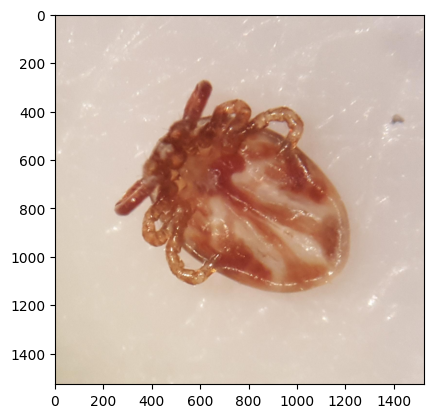

[0, 0, 0, 0, 1, 0, 0, 0, 1]
{'id': '2019-00016', 'spc': 'indeterminate', 'sex': nan, 'stg': nan, 'Eng': nan}
torch.Size([3, 224, 224])


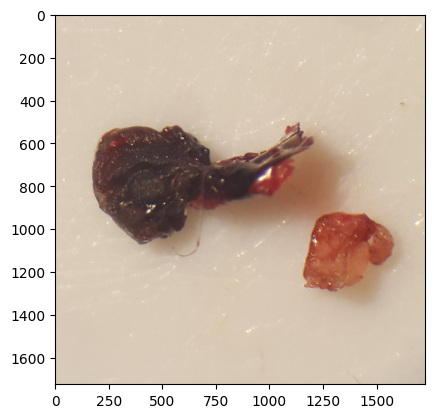

[0, 0, 0, 0, 1, 0, 0, 0, 1]
{'id': '2019-00015', 'spc': 'indeterminate', 'sex': nan, 'stg': nan, 'Eng': nan}
torch.Size([3, 224, 224])


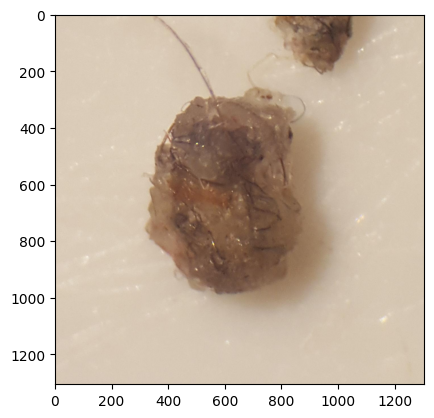

IndexError: ignored

In [255]:
for i in range(2,len(tick_train)):
  img, target,info = tick_train[i]

  if info['stg'] != "Adult":
    print(target)
    print(info)
    print(img.shape)
    tick_train.imshow(i)
    plt.show()

In [225]:
info = [d for d in data_dict if d['id'] == "2019-00005"]
print(info)

[{'id': '2019-00005', 'spc': 'Blacklegged tick', 'sex': 'Male', 'stg': 'Adult', 'Eng': 'Not engorged'}]


In [228]:
missing = []
paths = glob.glob("/content/drive/MyDrive/3k_ticks/*")
for path in paths:
  id = (path.split('/')[-1]).split(' ')[0]
  info =  [d for d in data_dict if d['id'] == id]
  if len(info)==0:
    missing.append(id)

print(len(missing))
print(missing)

55
2
['2019-00001', '2019-00001']
